Task 1 \\
Implement a Python class named LinearSVC which learns a linear Support Vector Classifier (SVC) from a set of training data. The class is required to have the following components: \\


*    A constructor init which initialize an SVC using the given learning rate, number of
epochs and a random seed. (Similar to the perceptron class in our textbook.)
*   A training function fit which trains the SVC based on a given labeled dataset. We consider
the soft-margin SVC using a hinge loss. You are required to integrate L2-regularization and expose the
regularization parameter to users
*   A function net input which computes the preactivation value for a given input sample.
*   A function predict which generates the prediction for a given input sample.





In [22]:
import numpy as np;
class LinearSVC:
  """
  A constructor init which initialize an SVC using the given learning rate, number of
  epochs and a random seed
  """
  def __init__(self, eta=0.001, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

  """
  A training function fit which trains the SVC based on a given labeled dataset. We consider
  the soft-margin SVC using a hinge loss. You are required to integrate L2-regularization and expose the
  regularization parameter to users.
  """
  """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of
          examples and n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.
        C : Regularization parameter. Should be greater than 0

        Returns
        -------
        self : object

        """
  def fit(self, X, y, C=0.01):

      rgen = np.random.RandomState(self.random_state)
      self.w_ = rgen.normal(loc=0.0, scale=0.01,
                            size=X.shape[1])
      self.b_ = np.float64(0.)
      self.errors_ = []

      for _ in range(self.n_iter):
          errors = 0
          for xi, target in zip(X, y):

              # Predicted score (z = wx+b)
              predicted_score = np.dot(self.w_ ,xi) + self.b_

              # Hinge Loss
              hinge_loss = max(0, 1 - (target * predicted_score))

              # Gradient
              if hinge_loss > 0:
                dw = np.dot(xi, target)
                db = target

                #Count misclassification
                errors += 1
              else:
                dw = np.zeros_like(self.w_)
                db = 0

              # Add regularization parameter to the gradient of weights
              dw += C*self.w_

              #Update weights and bias
              self.w_ += self.eta * dw
              self.b_ += self.eta * db

          self.errors_.append(errors)
      return self

  """
  A function net input which computes the preactivation value for a given input sample.
  """
  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.w_) + self.b_

  """
  A function predict which generates the prediction for a given input sample.
  """
  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.net_input(X) >= 0.0, 1, -1)

Task 2 \\
Write a Python function make classification which generates a set of linearly separable data
based on a random separation hyperplane. We learned that an (d − 1)-dimensional hyperplane can be defined
as the set of points in the Euclidean space Rd satisfying an equation  ̄aT  ̄x = b, i.e., { ̄x ∈ Rd |  ̄aT  ̄x = b}. For
simplicity, we assume that b = 0, then the hyperplane can be determined by a random vector  ̄a. We use this
idea to design the following algorithm to generate random data which are linearly separable:

*   Step 1. Randomly generate a d-dimensional vector  ̄a.
*   Step 2. Randomly select n samples  ̄x1, . . . ,  ̄xn in the range of [−u, u] in each dimension. You may use a uniform or Gaussian distribution to do so.
*   Step 3. Give each  ̄xi a label yi such that if  ̄aT  ̄x < 0 then yi = −1, otherwise yi = 1.

Therefore, your function should have the following parameters that should given by the user: d, n, u, and a
random seed for reproducing the data. You need to additionally subdivide the dataset to a training dataset
(70%) and a test dataset (30%). You may use the scikit-learn function to do so, but make sure that you
specify the random seed such that the subdivision is reproducible.

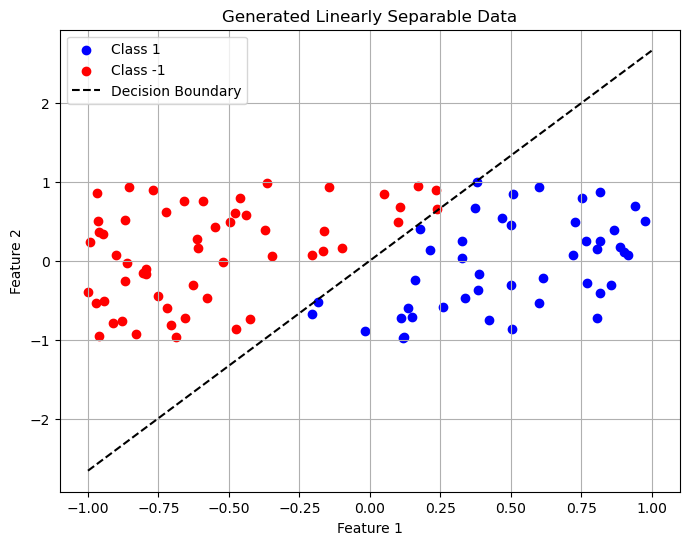

In [23]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

def make_classification(n, d, u=1.0, random_seed=1):
    """
    Generates a set of linearly separable data based on a random separation hyperplane.

    Parameters: 
    - n: Number of samples to generate.
    - d: Dimensionality of the data.
    - u: Range for generating random samples in each dimension (default is 1.0).
    - random_seed: Seed for random number generation (optional).

    Returns:
    - X: A numpy array of shape (n, d) containing the generated samples.
    - y: A numpy array of shape (n,) containing the labels (-1 or 1) for each sample.
    - a: The random vector defining the separation hyperplane.
    """

    # Set random seed for reproducibility
    np.random.seed(random_seed)

    # Step 1: Randomly generate a d-dimensional hyperplane vector a
    a = np.random.randn(d)

    # Step 2: Randomly select n samples in the range [-u, u] in each dimension
    X = np.random.uniform(low=-u, high=u, size=(n, d))

    # Step 3: Assign labels based on the position relative to the hyperplane
    y = np.where(np.dot(X, a) < 0, -1, 1)

    # Split into training(70%) and testing data(30%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle= True)

    return X_train, X_test, y_train, y_test, X, y, a

def plot_data(X, y, a, u):
    """
    Plots the generated dataset and the separating hyperplane.

    Parameters:
    - X: Feature matrix.
    - y: Labels.
    - a: Hyperplane normal vector.
    - u: Range for the generated samples.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label="Class 1")
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label="Class -1")

    # Plot decision boundary
    x_vals = np.linspace(-u, u, 100)
    y_vals = -(a[0] / a[1]) * x_vals  # Equation of the hyperplane

    plt.plot(x_vals, y_vals, 'k--', label="Decision Boundary")

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Generated Linearly Separable Data")
    plt.legend()
    plt.grid(True)
    plt.show()

#d=2, and n=100
X_train, X_test, y_train, y_test, X, y, a = make_classification(n=100, d=2, u=1.0, random_seed=1)
plot_data(X, y, a, u=1.0)


Task 3 \\
Investigate the scalability of the LinearSVC class you have implemented. You may consider the
datasets of the combinations of the following scales: d = 10, 50, 100, 500, 1000 and n = 500, 1000, 5000,
10000, 100000. Please feel free to adjust the scales according to your computers’ configurations, however the time costs should be obviously different. Make sure that you use the same dataset for each combination.
This can be controlled by using the same random seed (see textbook).

Task 3 \\
Investigate the scalability of the LinearSVC class you have implemented. You may consider the
datasets of the combinations of the following scales: d = 10, 50, 100, 500, 1000 and n = 500, 1000, 5000,
10000, 100000. Please feel free to adjust the scales according to your computers’ configurations, however the time costs should be obviously different. Make sure that you use the same dataset for each combination.
This can be controlled by using the same random seed (see textbook).

In [24]:
import time
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the combinations of n (samples) and d (features)
n_values = [500, 1000, 5000, 10000, 100000]
d_values = [10, 50, 100, 500, 1000]

# Store results
results = []

# Iterate over all combinations of n and d
for nv in n_values:
    for dv in d_values:
        # Generate a linearly separable dataset
        X_train, X_test, y_train, y_test, X, y, a = make_classification(n=nv, d=dv, u=1, random_seed=1)

        # Scale the data
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # Save the dataset
        filename = f"dataset_n{nv}_d{dv}.npz"
        np.savez(filename, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

        # Initialize LinearSVC
        model = LinearSVC(eta=0.01, n_iter=10000, random_state=1)

        # Measure training time
        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()

        execution_time = end_time - start_time

        # Predict and calculate accuracy
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # Store results
        results.append((nv, dv, execution_time, accuracy))

# Print results in a table
print("\nResults:")
print("n\t\td\t\tTraining Time (s)\tAccuracy")
print("---------------------------------------------------------")
for result in results:
    print(f"{result[0]}\t\t{result[1]}\t\t{result[2]:.4f}\t\t{result[3]:.4f}")

/var/folders/g3/j9ygnv1d6vbc694720ttcsnh0000gn/T/ipykernel_60863/1952973839.py:66: RuntimeWarning: overflow encountered in add
  self.w_ += self.eta * dw
/var/folders/g3/j9ygnv1d6vbc694720ttcsnh0000gn/T/ipykernel_60863/1952973839.py:66: RuntimeWarning: overflow encountered in add
  self.w_ += self.eta * dw
/var/folders/g3/j9ygnv1d6vbc694720ttcsnh0000gn/T/ipykernel_60863/1952973839.py:66: RuntimeWarning: overflow encountered in add
  self.w_ += self.eta * dw
/var/folders/g3/j9ygnv1d6vbc694720ttcsnh0000gn/T/ipykernel_60863/1952973839.py:66: RuntimeWarning: overflow encountered in add
  self.w_ += self.eta * dw
/var/folders/g3/j9ygnv1d6vbc694720ttcsnh0000gn/T/ipykernel_60863/1952973839.py:66: RuntimeWarning: overflow encountered in add
  self.w_ += self.eta * dw
/var/folders/g3/j9ygnv1d6vbc694720ttcsnh0000gn/T/ipykernel_60863/1952973839.py:66: RuntimeWarning: overflow encountered in add
  self.w_ += self.eta * dw
/var/folders/g3/j9ygnv1d6vbc694720ttcsnh0000gn/T/ipykernel_60863/1952973839.


Results:
n		d		Training Time (s)	Accuracy
---------------------------------------------------------
500		10		10.0643		0.9800
500		50		10.4912		0.9200
500		100		10.6804		0.8667
500		500		12.5966		0.7200
500		1000		15.0801		0.6667
1000		10		20.4599		0.9933
1000		50		20.9270		0.9733
1000		100		21.1384		0.9433
1000		500		25.0569		0.7867
1000		1000		30.0258		0.6767
5000		10		105.0968		0.5013
5000		50		105.5427		0.4933
5000		100		106.3985		0.5227
5000		500		130.0569		0.4893
5000		1000		157.4088		0.4740
10000		10		207.6757		0.5070
10000		50		209.8157		0.4983
10000		100		214.7844		0.5083
10000		500		264.3084		0.4917
10000		1000		318.5810		0.4970
100000		10		2096.3014		0.5028
100000		50		2105.1612		0.5008
100000		100		2135.9622		0.5015
100000		500		2638.2857		0.4989
100000		1000		3151.2647		0.5027


Task 4 \\
Read the scikit-learn documentation for SVMs. We are going to investigate the performance of
solving primal and dual problems in linear classification. You may use the same datasets generated in the
previous task. The easiest way to reuse a dataset is to keep all data in a file. In this task, you should use
the built-in class LinearSVC in sklearn.svm. You may use the hinge loss and the default value for the
regularization parameter. For each scale combination, e.g., d = 500, n = 1000, compare the time costs and
prediction accuracies (on the test dataset) of training a linear SVC by solving the primal and dual problems
respectively.

In [44]:
import time
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Define the combinations of n (samples) and d (features)
n_values = [500, 1000, 5000, 10000, 100000]
d_values = [10, 50, 100, 500, 1000]

# Store results
results = []

# Function to load a dataset from a .npz file
def load_dataset(filename):
    # Load the .npz file
    data = np.load(filename)
    
    # Extract the training and testing sets
    X_train = data['X_train']
    X_test = data['X_test']
    y_train = data['y_train']
    y_test = data['y_test']
    
    
    return X_train, X_test, y_train, y_test

# Function to train and evaluate LinearSVC
def train_and_evaluate(X_train, X_test, y_train, y_test):
    start_time = time.time()
    model = LinearSVC(dual='auto', loss='hinge', C=0.01, random_state=1, max_iter=10000)
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return training_time, accuracy

# Iterate over all combinations of n and d
for nv in n_values:
    for dv in d_values:
        # Construct the filename
        filename = f"dataset_n{nv}_d{dv}.npz"
        
        # Load the dataset
        X_train, X_test, y_train, y_test = load_dataset(filename)
        
        # Train and evaluate for primal formulation (dual=False)
        primal_time, primal_accuracy = train_and_evaluate(X_train, X_test, y_train, y_test)
        
        # Train and evaluate for dual formulation (dual=True)
        dual_time, dual_accuracy = train_and_evaluate(X_train, X_test, y_train, y_test)
        
        # Store results
        results.append((nv, dv, primal_time, primal_accuracy, dual_time, dual_accuracy))

# Print results in a table
print("\nResults:")
print("n\t\td\t\tPrimal Time (s)\tPrimal Accuracy\tDual Time (s)\tDual Accuracy")
print("-----------------------------------------------------------------------------------------")
for result in results:
    print(f"{result[0]}\t\t{result[1]}\t\t{result[2]:.4f}\t\t{result[3]:.4f}\t\t{result[4]:.4f}\t\t{result[5]:.4f}")

/opt/anaconda3/envs/assignment2/lib/python3.10/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/assignment2/lib/python3.10/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/assignment2/lib/python3.10/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/assignment2/lib/python3.10/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/assignment2/lib/python3.10/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Results:
n		d		Primal Time (s)	Primal Accuracy	Dual Time (s)	Dual Accuracy
-----------------------------------------------------------------------------------------
500		10		0.0034		0.9333		0.0009		0.9333
500		50		0.0036		0.8800		0.0022		0.8800
500		100		0.0026		0.8467		0.0020		0.8467
500		500		0.0307		0.6533		0.0242		0.6533
500		1000		0.0466		0.6333		0.0285		0.6333
1000		10		0.0040		0.9600		0.0014		0.9600
1000		50		0.0020		0.9133		0.0020		0.9133
1000		100		0.0070		0.9133		0.0092		0.9133
1000		500		0.0914		0.8233		0.0785		0.8233
1000		1000		0.0808		0.6333		0.0789		0.6333
5000		10		0.0020		0.9873		0.0019		0.9873
5000		50		0.0062		0.9687		0.0102		0.9687
5000		100		0.0268		0.9687		0.0274		0.9687
5000		500		0.5733		0.9200		0.5780		0.9200
5000		1000		1.6873		0.8713		1.6977		0.8713
10000		10		0.0035		0.9947		0.0090		0.9947
10000		50		0.0221		0.9793		0.0166		0.9793
10000		100		0.0602		0.9797		0.0550		0.9797
10000		500		1.0645		0.9427		1.0946		0.9427
10000		1000		3.9271		0.9200		3.9139		0.920

/opt/anaconda3/envs/assignment2/lib/python3.10/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [43]:
import time
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

# Define the combinations of n (samples) and d (features)
n_values = [500, 1000, 5000, 10000, 100000]
d_values = [10, 50, 100, 500, 1000]

# Store results
results = []

# Function to load a dataset from a .npz file
def load_dataset(filename):
    # Load the .npz file
    data = np.load(filename)
    
    # Extract the training and testing sets
    X_train = data['X_train']
    X_test = data['X_test']
    y_train = data['y_train']
    y_test = data['y_test']
    
    return X_train, X_test, y_train, y_test

# Function to train and evaluate SVM using both primal and dual methods
def train_and_evaluate(X_train, X_test, y_train, y_test, dual):
    start_time = time.time()
    
    if dual:
        model = LinearSVC(dual=True, loss="hinge", C=0.01, random_state=1, max_iter=10000)
    else:
        model = SGDClassifier(loss="hinge", alpha=0.01, random_state=1, max_iter=10000, tol=1e-3)
    
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return training_time, accuracy

# Iterate over all combinations of n and d
for nv in n_values:
    for dv in d_values:
        # Construct the filename
        filename = f"dataset_n{nv}_d{dv}.npz"
        
        # Load the dataset
        X_train, X_test, y_train, y_test = load_dataset(filename)
        
        # Train and evaluate for primal formulation (SGDClassifier)
        primal_time, primal_accuracy = train_and_evaluate(X_train, X_test, y_train, y_test, dual=False)
        
        # Train and evaluate for dual formulation (LinearSVC)
        dual_time, dual_accuracy = train_and_evaluate(X_train, X_test, y_train, y_test, dual=True)
        
        # Store results
        results.append((nv, dv, primal_time, primal_accuracy, dual_time, dual_accuracy))

# Print results in a table
print("\nResults:")
print("n\t\td\t\tPrimal Time (s)\tPrimal Accuracy\tDual Time (s)\tDual Accuracy")
print("-----------------------------------------------------------------------------------------")
for result in results:
    print(f"{result[0]}\t\t{result[1]}\t\t{result[2]:.4f}\t\t{result[3]:.4f}\t\t{result[4]:.4f}\t\t{result[5]:.4f}")


/opt/anaconda3/envs/assignment2/lib/python3.10/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Results:
n		d		Primal Time (s)	Primal Accuracy	Dual Time (s)	Dual Accuracy
-----------------------------------------------------------------------------------------
500		10		0.0215		0.9600		0.0014		0.9333
500		50		0.0015		0.9200		0.0022		0.8800
500		100		0.0026		0.8667		0.0093		0.8467
500		500		0.0049		0.6467		0.0219		0.6533
500		1000		0.0335		0.6067		0.0365		0.6333
1000		10		0.0013		0.9833		0.0006		0.9600
1000		50		0.0048		0.9467		0.0017		0.9133
1000		100		0.0043		0.9500		0.0058		0.9133
1000		500		0.0133		0.7767		0.0962		0.8233
1000		1000		0.0127		0.6667		0.0740		0.6333
5000		10		0.0016		0.9893		0.0016		0.9873
5000		50		0.0039		0.9740		0.0063		0.9687
5000		100		0.0101		0.9680		0.0225		0.9687
5000		500		0.0895		0.9353		0.5861		0.9200
5000		1000		0.2138		0.8820		1.8264		0.8713
10000		10		0.0025		0.9940		0.0026		0.9947
10000		50		0.0050		0.9787		0.0262		0.9793
10000		100		0.0184		0.9777		0.0489		0.9797
10000		500		0.1984		0.9440		1.1734		0.9427
10000		1000		0.3074		0.9267		4.9268		0.920

/opt/anaconda3/envs/assignment2/lib/python3.10/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
